### The usual imports and global variables

In [64]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [65]:
NUM_MOLS_COL_NAME = "num_mols"
PAD_LENGTH_COL_NAME = "pad_length"
FCD_COL_NAME = "fcd"
COL_NAMES = [NUM_MOLS_COL_NAME, PAD_LENGTH_COL_NAME, FCD_COL_NAME]
INPUT_DATA_FILE_NAME = "../../data/fcd.csv"
OUTPUT_FIGURE_FILE_NAME = "../../figures/fcd_values.jpg"
DEFAULT_PAD_LENGTH = 350  # the default padding length in the python fcd package

### Read the data collected from experiments

In [66]:
def read_data(
    file: Path | str = INPUT_DATA_FILE_NAME, column_names: list[str] = COL_NAMES
) -> pd.DataFrame:
    file = Path(file).resolve()
    if not file.is_file():
        raise FileNotFoundError(f"File {file} does not exist")
    df: pd.DataFrame
    df = pd.read_csv(file, usecols=column_names)
    return df

In [67]:
data = read_data()
number_of_molecules = data[NUM_MOLS_COL_NAME].unique()
pad_lengths = data[PAD_LENGTH_COL_NAME].unique()

### Plot the FCD values against the number of reference molecules for different padding lengths

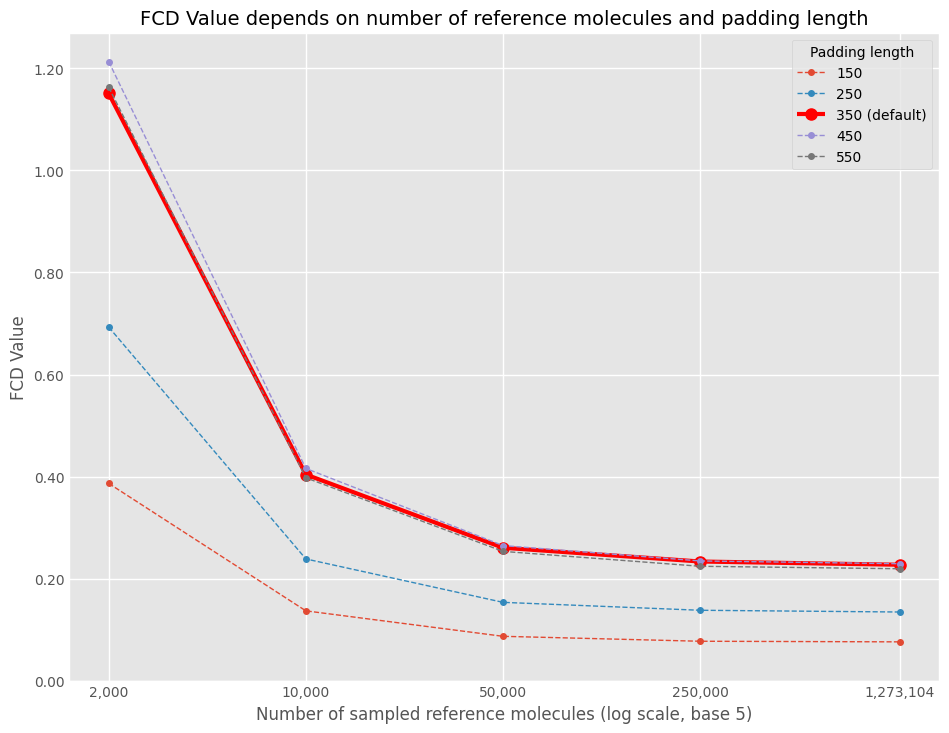

In [68]:
# Set up the figure
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the lines
for pad_length in pad_lengths:
    # Format the default padding length differently
    if pad_length == DEFAULT_PAD_LENGTH:
        markersize = 8
        linewidth = 3
        marker = "o"
        linestyle = "-"
        color = "red"
        append_legend = " (default)"
    else:
        markersize = 4
        linewidth = 1
        marker = "o"
        linestyle = "--"
        color = None
        append_legend = ""

    # Gather data and plot the line
    fcd_values = data[data[PAD_LENGTH_COL_NAME] == pad_length][FCD_COL_NAME]
    ax.plot(
        number_of_molecules,
        fcd_values,
        color=color,
        linestyle=linestyle,
        marker="o",
        markersize=markersize,
        linewidth=linewidth,
        label=f"{pad_length}{append_legend}",
    )

# Setup the x-axis
ax.set_xscale("log", base=5)
ax.set_xticks(number_of_molecules)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Number of sampled reference molecules (log scale, base 5)")

# Setup the y-axis
ax.set_ylim(0)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))
ax.set_ylabel("FCD Value")

# Add a title, grid, and legend
ax.set_title(
    "FCD Value depends on number of reference molecules and padding length", fontsize=14
)
ax.yaxis.grid(True)
ax.legend(title="Padding length")

# Show the plot & save the figure
plt.show()
fig.savefig(OUTPUT_FIGURE_FILE_NAME)